In [1]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=33165e5f9eb51b7eeb71bbde350c78ad1ccdb4d53d706ad7440055531c9ad9ee
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [2]:
!pip install Pillow

Digite o nome da pessoa: Heven
Aguarde enquanto tiramos sua foto...


<IPython.core.display.Javascript object>

Nova foto salva com o nome: Heven
Aguarde enquanto fazemos o reconhecimento facial...
Digite o nome da pessoa para reconhecimento: Heven


<IPython.core.display.Javascript object>

[0.82379338 0.38811592 0.36479708]
Pessoa reconhecida: HEVEN


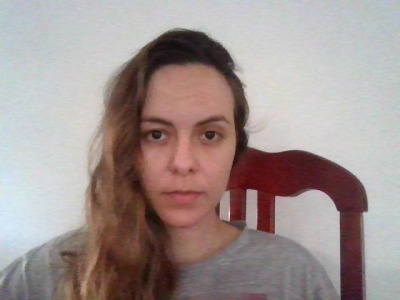

HEVEN


In [4]:
import cv2
import numpy as np
import face_recognition
import os
import imutils
from PIL import Image
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

# Caminho para as imagens conhecidas
path = '/content/images'
images = []
classNames = []

# Carregando imagens conhecidas
myList = os.listdir(path)
for cl in myList:
    curImg = cv2.imread(f'{path}/{cl}')
    images.append(curImg)
    classNames.append(os.path.splitext(cl)[0])

# Função para encontrar encodings das imagens conhecidas
def findEncodings(images):
    encodeList = []
    for img in images:
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            encode = face_recognition.face_encodings(img)[0]
            encodeList.append(encode)
    return encodeList

# Encontrar encodings das imagens conhecidas
encodeListKnown = findEncodings(images)

# Função para tirar uma foto da câmera no Colab
def take_photo(nome, quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
          const div = document.createElement('div');
          const capture = document.createElement('button');
          capture.textContent = 'Capture';
          div.appendChild(capture);

          const video = document.createElement('video');
          video.style.display = 'block';
          const stream = await navigator.mediaDevices.getUserMedia({video: true});

          document.body.appendChild(div);
          div.appendChild(video);
          video.srcObject = stream;
          await video.play();

          // Resize the output to fit the video element.
          google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

          // Wait for Capture to be clicked.
          await new Promise((resolve) => capture.onclick = resolve);

          const canvas = document.createElement('canvas');
          canvas.width = video.videoWidth;
          canvas.height = video.videoHeight;
          canvas.getContext('2d').drawImage(video, 0, 0);
          stream.getVideoTracks()[0].stop();
          div.remove();
          return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    filename = f'{path}/{nome}.jpg'
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Função para cadastrar um novo rosto
def cadastrar_rosto():
    # Solicitar que o usuário digite o nome
    nome = input("Digite o nome da pessoa: ")

    print("Aguarde enquanto tiramos sua foto...")
    image_file = take_photo(nome)
    novo_rosto = cv2.imread(image_file)
    novo_rosto = imutils.resize(novo_rosto, width=400)

    # Salvar nova imagem na pasta com o nome
    cv2.imwrite(f'{path}/{nome}.jpg', novo_rosto)
    print(f"Nova foto salva com o nome: {nome}")

    # Atualizar listas de encodings conhecidos
    global images, classNames, encodeListKnown
    images.append(novo_rosto)
    classNames.append(nome)
    encodeListKnown = findEncodings(images)

# Cadastro de um novo rosto
cadastrar_rosto()

# Função para reconhecer um rosto
def reconhecer_rosto():
    print("Aguarde enquanto fazemos o reconhecimento facial...")

    # Solicitar que o usuário digite o nome
    nome_pessoa = input("Digite o nome da pessoa para reconhecimento: ")

    # Tirar uma foto para reconhecimento com o nome da pessoa
    image_file = take_photo(nome_pessoa)
    image = cv2.imread(image_file)
    image = imutils.resize(image, width=400)

    # Detectar rostos na imagem
    imgS = cv2.resize(image, (0, 0), fx=0.25, fy=0.25)
    imgs = cv2.cvtColor(imgS, cv2.COLOR_BGR2RGB)
    facesCurFrame = face_recognition.face_locations(imgS)
    encodesCurFrame = face_recognition.face_encodings(imgS, facesCurFrame)

    # Iterar sobre cada rosto encontrado
    for encodeFace, faceLoc in zip(encodesCurFrame, facesCurFrame):
        # Comparar os encodings do rosto atual com os encodings conhecidos
        matches = face_recognition.compare_faces(encodeListKnown, encodeFace)
        faceDis = face_recognition.face_distance(encodeListKnown, encodeFace)
        print(faceDis)
        matchIndex = np.argmin(faceDis)

        # Se houver uma correspondência, identifique o rosto
        if matches[matchIndex]:
            nome = classNames[matchIndex].upper()
            print(f"Pessoa reconhecida: {nome}")
            display(Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)))
            return nome

    print("Pessoa não reconhecida.")
    display(Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)))

# Reconhecimento facial
nome_reconhecido = reconhecer_rosto()
print(nome_reconhecido)


Aguarde enquanto fazemos o reconhecimento facial...


None

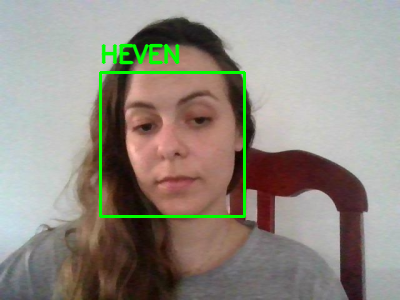

In [5]:
from PIL import Image, ImageDraw, ImageFont
from google.colab.patches import cv2_imshow
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
import face_recognition
import os

# Caminho para as imagens conhecidas
path = '/content/images'
images = []
classNames = []

# Carregando imagens conhecidas
myList = os.listdir(path)
for cl in myList:
    curImg = cv2.imread(f'{path}/{cl}')
    images.append(curImg)
    classNames.append(os.path.splitext(cl)[0])

# Função para encontrar encodings das imagens conhecidas
def findEncodings(images):
    encodeList = []
    for img in images:
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            encode = face_recognition.face_encodings(img)[0]
            encodeList.append(encode)
    return encodeList

# Encontrar encodings das imagens conhecidas
encodeListKnown = findEncodings(images)

# Função para tirar uma foto da câmera no Colab
def take_photo(filename='photo.jpg', quality=0.8):
    js = f'''
    async function takePhoto(quality) {{
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({{ video: true }});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }}
    '''

    display(eval_js(js))
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Função para reconhecer um rosto
def reconhecer_rosto():
    print("Aguarde enquanto fazemos o reconhecimento facial...")
    # Tirar uma foto para reconhecimento
    image_file = take_photo("reconhecimento")
    image = cv2.imread(image_file)
    image = imutils.resize(image, width=400)

    # Executar reconhecimento facial
    imgS = cv2.resize(image, (0, 0), fx=0.25, fy=0.25)
    imgs = cv2.cvtColor(imgS, cv2.COLOR_BGR2RGB)
    facesCurFrame = face_recognition.face_locations(imgS)
    encodesCurFrame = face_recognition.face_encodings(imgS, facesCurFrame)

    for encodeFace, faceLoc in zip(encodesCurFrame, facesCurFrame):
        matches = face_recognition.compare_faces(encodeListKnown, encodeFace)
        faceDis = face_recognition.face_distance(encodeListKnown, encodeFace)

        if True in matches:
            first_match_index = matches.index(True)
            name = classNames[first_match_index].upper()

            # Desenhar um retângulo ao redor do rosto
            (top, right, bottom, left) = faceLoc
            cv2.rectangle(image, (left * 4, top * 4), (right * 4, bottom * 4), (0, 255, 0), 2)

            # Exibir o nome da pessoa na tela
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(image, name, (left * 4, top * 4 - 10), font, 0.8, (0, 255, 0), 2, cv2.LINE_AA)
        else:
            # Se não houver correspondência, mostrar "Acesso Negado"
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(image, "Acesso Negado", (50, 50), font, 1, (0, 0, 255), 2, cv2.LINE_AA)

    # Exibir a imagem com as marcações dos rostos
    cv2_imshow(image)

# Executar reconhecimento facial
reconhecer_rosto()

